In [14]:
"""Import a training set and train the network
Then import a test set and try the network on it
"""
import math
import os
os.chdir("/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic")

import numpy as np
from matplotlib import pyplot as plt
import h5py
import DYNAPSETools.dynapseSpikesFitter as fitter
from sklearn import linear_model

#folderName = os.path.dirname(os.path.abspath(__file__))

folderName = "/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic/caer/myoutputs/"




In [15]:
plt.close('all')

trainDataset = "classification1_sic.hdf5"
testDataset = "classification1_sic.hdf5"



# ======================================== TRAINING
# Import training data from dataset
fileName = os.path.join(folderName, trainDataset)
h5f = h5py.File(fileName, "r")
importedData = h5f["data"][:]
importedTarget = h5f["target"][:]
h5f.close()

# Merge together all data (for linear regression)
data = np.concatenate(importedData, axis = 1)
target = np.concatenate(importedTarget, axis = 1)


from sklearn import linear_model
regr = linear_model.Ridge(alpha = 1)

regr.fit(data.T, target.T)
coefficients = regr.coef_


Performance: 99.669967


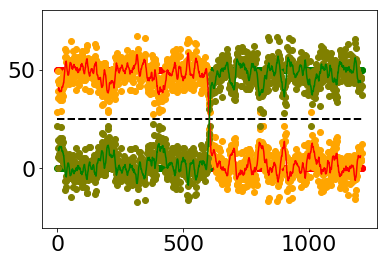

In [16]:

#%%
# ======================================== TESTING
# Import test data from dataset
fileName = os.path.join(folderName, testDataset)
h5f = h5py.File(fileName, "r")
importedData = h5f["data"][:]
importedTarget = h5f["target"][:]
h5f.close()

# Merge together all test data
data = np.concatenate(importedData, axis = 1)
target = np.concatenate(importedTarget, axis = 1)

# Make prediction
#prediction = fitter.pseudo_inv_prevision(coefficients = coefficients, matrix =  data)
prediction = fitter.sklearn_prevision(regr = regr, matrix = data)

## Transform target to shape (time step, neuron)
target = target.T

timeScale = np.arange(np.shape(data)[1])
rights, wrongs = fitter.prediction_performances(prediction = prediction, target = target, firingRateThreshold = 25)
print("Performance: {:f}".format(rights / len(prediction) * 100))



# Apply running average
# N = 5
N = 10
kernel = np.ones((N,))/N
runningAvN0 = np.convolve(prediction[:,0], kernel, mode='valid')
runningAvN1 = np.convolve(prediction[:,1], kernel, mode='valid')

# ======================================== PLOTTING
plt.rcParams.update({'font.size': 22})

fig, ax, handles = fitter.prediction_plot(timeScale = timeScale, prediction = prediction, target = target)
threshold, = ax.plot([timeScale[0], timeScale[-1]], [25, 25], "k--", lw=2)
averageN0, = ax.plot(timeScale[(N-1):] - math.floor(N/2) , runningAvN0, color = "red")
averageN1, = ax.plot(timeScale[(N-1):] - math.floor(N/2), runningAvN1, color = "green")


handles[0][0].set_color("red")
handles[1][0].set_color("orange")
handles[0][1].set_color("green")
handles[1][1].set_color("olive")
#ax.legend([handles[0][0], handles[1][0], handles[0][1], handles[1][1], threshold],
#          ["out N0 target", "out N0 predicted", "out N1 target", "out N1 predicted", "threshold"],
#          loc = 1)
ax.set_ylim([-30,80])

plt.show()

#%%